In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/cross-site-scripting-xss-dataset-for-deep-learning/XSS_dataset.csv")

In [3]:
X = csr_matrix(df.drop(['Sentence'], axis=1).values)
y = df['Label'].values

In [4]:
X = X.toarray()
print(X)

[[    0     0]
 [    1     1]
 [    2     0]
 ...
 [13683     1]
 [13684     0]
 [13685     0]]


In [5]:
for c in range(X.shape[1]):
    if isinstance(X[0,c], str):
        lbl = LabelEncoder()
        lbl.fit(list(X[:,c]))
        X[:,c] = lbl.transform(X[:,c])
        
    print(X)

[[    0     0]
 [    1     1]
 [    2     0]
 ...
 [13683     1]
 [13684     0]
 [13685     0]]
[[    0     0]
 [    1     1]
 [    2     0]
 ...
 [13683     1]
 [13684     0]
 [13685     0]]


In [6]:
def get_models():
    models = dict()
    models['lr'] = make_pipeline(StandardScaler(), LogisticRegression())
    models['knn'] = make_pipeline(StandardScaler(), KNeighborsClassifier())
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = make_pipeline(StandardScaler(), SVC())
    models['bayes'] = make_pipeline(StandardScaler(), GaussianNB())
    return models

In [7]:
models = get_models()
results, names = list(), list()
print(models)

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())]), 'knn': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())]), 'cart': DecisionTreeClassifier(), 'svm': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())]), 'bayes': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])}


In [8]:
for name, model in models.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>lr 1.000 (0.000)
>knn 1.000 (0.000)
>cart 1.000 (0.000)
>svm 1.000 (0.000)
>bayes 1.000 (0.000)


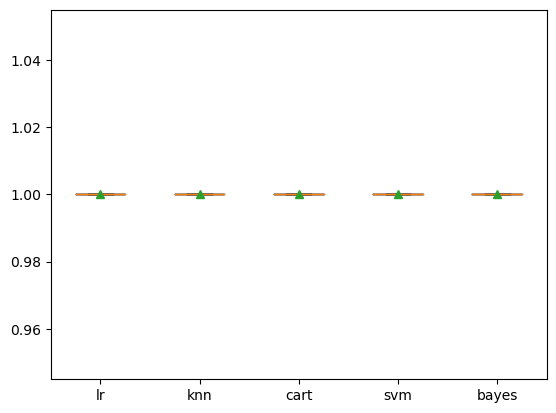

In [9]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()